## Install packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from numpy import asarray
from numpy import savetxt
import matplotlib.colors as mcolors
import matplotlib.cm
import matplotlib.patches as mpatches
import umap
import matplotlib as mpl
import scanpy as sc
import scipy
import kmapper as km
from kmapper import jupyter
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
import plotly.graph_objs as go
import sys
from sklearn import ensemble
from tqdm import tqdm
from ripser import Rips
from sklearn.metrics.pairwise import euclidean_distances

## Read in data

In [2]:
pd_data = pd.read_csv("cell_cycle.csv", sep=',', header = 0, index_col = 0) 
np_data = np.array(pd_data)

In [3]:
pd_data

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000286234,ENSG00000286235,ENSG00000286237,ENSG00000286239,ENSG00000286243,ENSG00000286255,ENSG00000286261,ENSG00000286264,ENSG00000286265,ENSG00000286268
A10_355,31.44,0.0,108.00,5.02,11.69,0.0,0.00,24.99,7.74,16.25,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,6.05
A10_356,45.47,0.0,34.09,0.00,18.93,0.0,0.00,11.14,16.90,4.35,...,0.0,1.02,0.0,10.41,0.0,0.0,3.56,0.0,0.0,0.00
A10_357,8.79,0.0,97.98,0.00,24.30,0.0,0.00,66.16,27.88,20.81,...,0.0,0.54,0.0,0.00,0.0,0.0,2.88,0.0,0.0,0.00
A11_355,27.14,0.0,69.77,0.49,33.56,0.0,0.00,9.23,7.59,23.10,...,0.0,0.00,0.0,6.30,0.0,0.0,0.00,0.0,0.0,0.00
A11_356,129.83,0.0,37.72,6.50,5.55,0.0,0.00,47.08,16.90,14.69,...,0.0,0.00,0.0,12.21,0.0,0.0,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P8_356,21.52,0.0,70.02,7.23,13.10,0.0,0.00,43.42,10.12,22.11,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00
P8_357,48.58,0.0,70.27,0.54,48.05,0.0,0.00,26.30,11.02,19.82,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00
P9_355,69.57,0.0,60.75,7.52,18.89,0.0,10.84,86.98,0.00,7.45,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00
P9_356,60.22,0.0,50.06,0.00,12.25,0.0,0.00,29.76,15.65,8.23,...,0.0,0.00,0.0,1.11,0.0,0.0,0.00,0.0,0.0,0.00


In [4]:
reducer = umap.UMAP()
UMAP = reducer.fit_transform(np_data.T)
print(UMAP.shape)

#savetxt('cellcycle_umap.csv', UMAP, delimiter=',')

(42728, 2)


In [5]:
UMAP = pd.read_csv("cellcycle_umap.csv", sep=',', header = None)
UMAP = UMAP.values 

print("UMAP shape: "+repr(UMAP.shape))

UMAP shape: (42728, 2)


No handles with labels found to put in legend.


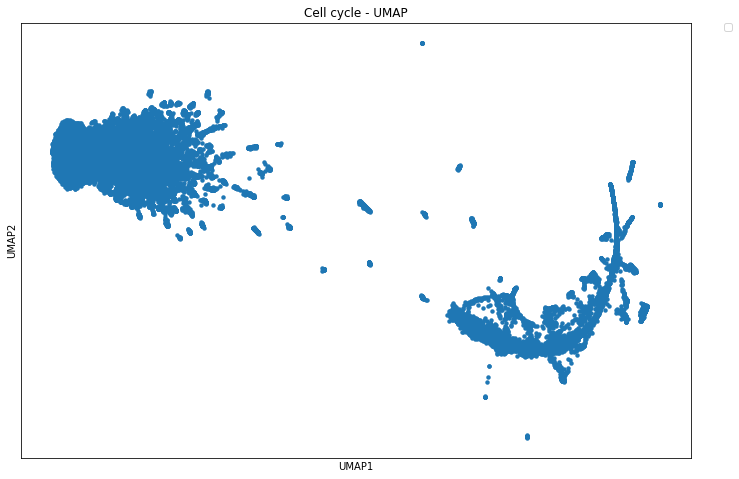

In [6]:
plt.figure(figsize=(12, 8))
frame1 = sns.scatterplot(UMAP[:,0], UMAP[:,1], s=20,  linewidth = 0)
plt.title('Cell cycle - UMAP')
#plt.xlim(-30000,25000)
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Distance Matrix

In [7]:
from manifold_utils.mSVD import eigen_plot, eigen_calc_from_dist_mat, eps_projection

In [8]:
np_data = np_data.T
N, d = np_data.shape
 
dist_mat = euclidean_distances(np_data, np_data)

In [9]:
#savetxt('dist_mat_cellcycle.csv', dist_mat, delimiter=',')

#dist_mat = pd.read_csv('dist_mat_cellcycle.csv', sep=",", header = None)
#dist_mat = np.array(dist_mat )

In [10]:
print(dist_mat.shape)

(42728, 42728)


## Visualize Landmarks

In [11]:
from time import time
import numpy as np
from tda_utils.density_filtration import sort_distances_per_point, indices_for_density_filtration
from tda_utils.witness_complex import *

dist_per_pt = sort_distances_per_point(dist_mat)

# Load in ILC data
sct_sparse = np_data
dist_mat = dist_mat
n, d = sct_sparse.shape
print("n = "+str(n))
print("d = "+str(d))
print("shape of dist_mat: "+str(dist_mat.shape))

# Load in distances per point
distances_per_point = dist_per_pt

# time computation of density filtrations
print("Timing computation of density filtrations...")
density_indices = dict()
density_filtrations = dict()
ks = [10, 100, 1000]
#      10000]
ps = [0.01, 0.05, 0.1, 0.2]
for k in ks:
    for p in ps:
        print("\tk = "+str(k)+", p = "+str(p)+":")
        start = time()
        indices = indices_for_density_filtration(distances_per_point, k, p)
        density_indices[(k, p)] = indices
        mask = np.zeros(n, dtype=bool)
        mask[indices] = True
        sqr_mask = np.outer(mask, mask)
        density_filtrations[(k, p)] = np.reshape(dist_mat[sqr_mask], (len(indices), len(indices)))
        print("\t"+str(time()-start)+" seconds\n")

print("Timing computation of landmarks...")
landmark_indices = dict()
landmark_mats = dict()
pps = [0.05, 0.1, 0.2]
for k in ks:
    for p in ps:
        for pp in pps:
            print("\tk = "+str(k)+", p = "+str(p)+", pp = "+str(pp)+":")
            start = time()
            landmark_indices[(k, p, pp)], landmark_mats[(k, p, pp)] = choose_landmarks(density_filtrations[(k, p)], pp)
            print("\t"+str(time()-start)+" seconds\n")

print("Printing numbers of landmarks...")
for k in ks:
    for p in ps:
        for pp in pps:
            toople = (k, p, pp)
            print(str(toople)+": "+str(len(landmark_indices[toople])))
            if toople == (1000, 0.2, 0.2):
                print("saving")
                landmark_inds = landmark_indices[toople]
                dense_inds = density_indices[(k, p)]
                true_inds = [dense_inds[ind] for ind in landmark_inds]
                print(true_inds)
                to_save = np.vstack([sct_sparse[ind, :] for ind in true_inds])
                np.save("PanSquam_landmarks.npy", to_save)
                np.save("PanSquam_Racute_landmark_indices.npy", true_inds)

n = 42728
d = 1152
shape of dist_mat: (42728, 42728)
Timing computation of density filtrations...
	k = 10, p = 0.01:
	1.6833786964416504 seconds

	k = 10, p = 0.05:
	1.8114073276519775 seconds

	k = 10, p = 0.1:
	2.091470241546631 seconds

	k = 10, p = 0.2:
	3.1867170333862305 seconds

	k = 100, p = 0.01:
	1.7253880500793457 seconds

	k = 100, p = 0.05:
	1.8564178943634033 seconds

	k = 100, p = 0.1:
	2.033447742462158 seconds

	k = 100, p = 0.2:
	3.1487178802490234 seconds

	k = 1000, p = 0.01:
	1.7463929653167725 seconds

	k = 1000, p = 0.05:
	1.8144080638885498 seconds

	k = 1000, p = 0.1:
	2.0264556407928467 seconds

	k = 1000, p = 0.2:
	3.1056888103485107 seconds

Timing computation of landmarks...
	k = 10, p = 0.01, pp = 0.05:
	0.0 seconds

	k = 10, p = 0.01, pp = 0.1:
	0.0 seconds

	k = 10, p = 0.01, pp = 0.2:
	0.0 seconds

	k = 10, p = 0.05, pp = 0.05:
	0.0029997825622558594 seconds

	k = 10, p = 0.05, pp = 0.1:
	0.004001140594482422 seconds

	k = 10, p = 0.05, pp = 0.2:
	0.006

In [12]:
landmarks = np.load("PanSquam_landmarks.npy")

landmarks = true_inds
print(true_inds)

[24812, 40019, 30833, 40036, 21137, 31428, 19614, 27333, 30254, 18908, 22903, 23002, 22705, 23135, 27419, 29968, 34801, 33262, 21495, 21190, 18452, 3339, 19594, 28836, 18073, 37832, 17695, 33410, 33425, 17252, 35088, 31212, 34351, 15369, 25679, 28779, 15933, 23735, 38923, 23749, 7692, 23209, 37687, 18680, 19195, 29468, 33364, 36313, 33028, 36785, 18103, 14966, 33402, 30758, 27648, 28565, 29900, 17990, 25065, 17998, 18986, 23818, 20183, 10791, 31233, 17803, 33781, 39044, 18968, 39136, 23297, 21307, 26102, 22742, 24371, 33374, 24450, 37434, 17156, 14310, 39365, 40022, 20779, 33313, 23424, 32031, 11790, 38185, 18836, 25702, 38312, 18459, 32391, 37170, 29757, 34382, 15150, 37520, 28955, 35002, 27038, 31863, 14027, 34182, 13714, 21522, 20725, 14757, 28356, 39109, 11065, 17833, 15148, 12603, 34043, 11939, 20517, 18665, 21010, 20670, 25546, 39521, 25603, 39855, 13499, 18149, 23079, 16781, 35678, 25657, 20685, 19122, 17223, 12333, 22509, 39663, 29434, 14930, 21421, 24178, 25637, 20730, 32933, 

In [13]:
N, d = np_data.shape
genes = pd_data.columns

UMAP = np.array(UMAP)
print(UMAP.shape)

UMAP_landmark = np.zeros((1,2))
data_landmark = np.zeros((1,d))

#Going through all of the cells, if index in landmarks we should pull the associated gene expression data
for i in landmarks:
    next_cell = np_data[i,:]
    next_cell = np.reshape(next_cell, (1, d))
    data_landmark = np.append(data_landmark, next_cell, axis = 0)
        
    next_embedding = UMAP[i,:]
    next_embedding = np.reshape(next_embedding, (1,2))
    UMAP_landmark = np.append(UMAP_landmark, next_embedding, axis = 0)

#To get the indices to work out I have a row of zeros at the top that I need to omit
data_landmark = data_landmark[1:, :]    
UMAP_landmark = UMAP_landmark[1:, :]

print(data_landmark.shape)
print(UMAP_landmark.shape)

(42728, 2)
(1709, 1152)
(1709, 2)


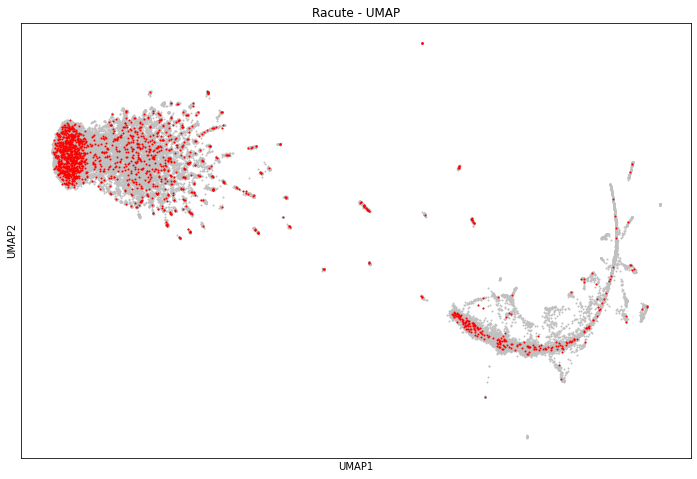

In [14]:
plt.figure(figsize=(12, 8))
frame1 = plt.scatter(UMAP[:,0], UMAP[:,1], s=1, c = "silver")
frame1 = plt.scatter(UMAP_landmark[:,0], UMAP_landmark[:,1], s=1, c = "red")
plt.title('Racute - UMAP')
#plt.xlim(-30000,25000)
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.show()

## Persistence Diagrams

In [15]:
#rips = Rips()
#diagrams = rips.fit_transform(dist_mat, distance_matrix=True, metric="euclidean")
#rips.plot(diagrams)

## Eigen plots

In [16]:
from manifold_utils.mSVD import eigen_plot, eigen_calc_from_dist_mat, eps_projection, eigen_plot_numPoints, eigen_calc_from_dist_mat_withNumPoints
from manifold_utils.iga import chakraborty_express, iga

  0%|                                                                                         | 0/1709 [00:00<?, ?it/s]

24812


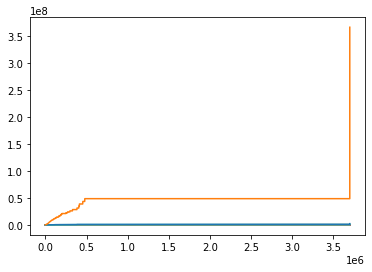

  0%|                                                                           | 1/1709 [18:29<526:32:36, 1109.81s/it]

40019


  0%|                                                                           | 1/1709 [31:00<882:28:47, 1860.03s/it]


KeyboardInterrupt: 

In [17]:
for i in tqdm(range(len(landmarks))):
    print(landmarks[i])
    center = landmarks[i]
    radii, eigval_list, eigvec_list = eigen_calc_from_dist_mat(np_data, dist_mat, center, radint = 10)

    rmin = radii[0]
    rmax = radii[-1]
    
    eigen_plot(eigval_list, radii, rmin, rmax)

In [19]:
dist_mat.shape

(42728, 42728)